## Spring 2021 Data Bootcamp Midterm Project


### Daniel Abboudi

### Carlisle Catacutan

### Garima Chaudhary

## To start our project we imported packages and read-in the csv file. To better understand the data we read it in as a dataframe. 

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = 'C:/Users/catac/Desktop/Spring 2021/Data Bootcamp/DB_MidtermSampleData_Mar21.csv'

In [42]:
df = pd.read_csv(path)
df

,company,sector,month,job_category,region,gender,count,inflow,outflow
0,SAP SE,Information Technology,2013-10,technician,South America,female,50.711959,4.849139e-01,1.406462e+00
1,Wells Fargo & Company,Financials,2013-10,technician,Pacific Islands,female,1.819455,6.467172e-07,6.981965e-07
2,MICROSOFT CORPORATION,Information Technology,2013-10,scientist,Northern America,male,1541.799779,3.127633e+01,2.168564e+01
3,DXC Technology Co,Information Technology,2013-10,sales,Western Europe,female,62.103364,3.428746e+00,4.043797e-03
4,United Technologies Corporation,Industrials,2013-10,administrative,Western Europe,male,77.189915,4.131975e-05,1.567777e-03
...,...,...,...,...,...,...,...,...,...
2379029,International Business Machines Corporation,Information Technology,2015-09,empty,Northern Europe,male,981.675002,3.283342e+01,2.577147e+01
2379030,IQVIA,Information Technology,2018-07,empty,South-Eastern Asia,male,47.651149,1.246570e+00,5.287461e-01
2379031,"Delta Air Lines, Inc.",Industrials,2016-10,administrative,Northern Africa,female,0.000000,0.000000e+00,0.000000e+00
2379032,"HCA Healthcare, Inc.",Health Care,2017-05,empty,Northern Europe,male,19.443301,6.653489e-01,5.603069e-01


## We then cleaned up the data by replacing the empty fields.

In [43]:
# Treat 'empty' fields as NaN
df = df.replace('empty',np.NaN)

## We were interested in the companies listed in the dataframe so we listed them out.

In [44]:
df['company'].value_counts().index

Index(['Intel Corporation', 'Coca-Cola Company', 'JPMorgan Chase',
       'Johnson & Johnson', 'Procter & Gamble Co', 'General Electric Company',
       'Amazon.com, Inc.', 'PepsiCo, Inc.', 'Siemens AG',
       'International Business Machines Corporation', 'Walmart Inc',
       'Alphabet Inc.', 'Omnicom Group Inc',
       'Hewlett Packard Enterprise Company', 'MICROSOFT CORPORATION',
       'Verizon Communications Inc.', 'Oracle Corporation', 'AT&T',
       'Accenture PLC', 'Dell Technologies Inc', 'Pfizer Inc',
       'Morgan Stanley', 'Walt Disney Company', 'Facebook Inc', 'Novartis AG',
       'Ford Motor Company', 'GENERAL MOTORS COMPANY', 'Nestle SA',
       'Barclays PLC', 'CVS Health Corporation', 'Honeywell International Inc',
       'Unilever NV', 'ABB Ltd', 'Apple, Inc.', 'Tata Group',
       'Vodafone Group PLC', 'Volkswagen AG', 'Orange SA',
       'Bank of America Corporation', 'Roche Holding AG',
       'United Technologies Corporation', 'Staples Inc.', 'Citigroup Inc',


## Then we checked each column of data to see what type of data we were working with.

In [45]:
df.dtypes

company          object
sector           object
month            object
job_category     object
region           object
gender           object
count           float64
inflow          float64
outflow         float64
dtype: object

## Our approach was to build a set of code that would provide answers to a standard set of questions, where we could easily change the company name and sector.

In [46]:
# Define Company
company = 'SAP SE'

# Define Sector
sector = 'Information Technology'

## So we started by filtering the dataframe for the company and sector we were interested in exploring.

In [47]:
# Pull company
com = df.loc[df['company']==company,:]
com

,company,sector,month,job_category,region,gender,count,inflow,outflow
0,SAP SE,Information Technology,2013-10,technician,South America,female,50.711959,0.484914,1.406462
26,SAP SE,Information Technology,2013-10,administrative,Eastern Europe,male,41.236555,0.000022,0.000031
167,SAP SE,Information Technology,2013-10,engineer,Northern Africa,male,156.300591,0.000059,0.501572
176,SAP SE,Information Technology,2013-10,scientist,Western Europe,male,194.319759,11.413328,2.222567
187,SAP SE,Information Technology,2013-10,administrative,South-Eastern Asia,female,92.466369,0.246246,3.818941
...,...,...,...,...,...,...,...,...,...
2378723,SAP SE,Information Technology,2020-07,NaN,Central America and the Caribbean,male,86.420977,3.818872,1.710582
2378782,SAP SE,Information Technology,2014-07,NaN,NaN,female,1.826256,0.000001,0.000001
2378800,SAP SE,Information Technology,2018-01,NaN,Southern Europe,male,142.251053,13.101454,3.518925
2378814,SAP SE,Information Technology,2018-04,NaN,Southern Europe,male,147.504589,6.378401,1.989012


## Then we looked into some simple questions about the company makeup.

In [48]:
# How many employees does the company have?
com.loc[com['month']==com['month'].max(),'count'].sum()

147147.36936868023

In [49]:
# How many males?
com.loc[(com['month']==com['month'].max()) & (com['gender']=='male'),'count'].sum()

91598.61110176175

In [50]:
# How many females?
com.loc[(com['month']==com['month'].max()) & (com['gender']=='female'),'count'].sum()

55548.758266918456

## Then we created another dataframe to look deeping into the types of roles that each gender had within the company.

In [51]:
# What positions do com employees fulfill? Need to sum by 'job_category'
com2 = com.loc[com['month']==com['month'].max(),:]
com2 = com2.groupby(['job_category','gender']).agg({'count':'sum'})
com2 = com2.reset_index()

# Split the data into two groups by gender
male = com2.loc[com2['gender']=='male',:].set_index('job_category')
female = com2.loc[com2['gender']=='female',:].set_index('job_category')
female

,gender,count
job_category,,
administrative,female,1667.136698
engineer,female,21896.292123
finance,female,2807.347850
management,female,12073.744171
marketing,female,2454.891281
sales,female,8996.800267
scientist,female,515.126167
technician,female,964.722746


In [52]:
male

,gender,count
job_category,,
administrative,male,1121.238775
engineer,male,42723.145686
finance,male,2160.375735
management,male,19768.980969
marketing,male,2429.439793
sales,male,14706.523032
scientist,male,643.006230
technician,male,1327.997822


## With this data in hand, we wanted to see how the company compared to other companies in the same sector. So we refiltered the original data.

In [53]:
# Pull Sector data and Remove company from this data to compare rest of sector to company
sector_df = df.loc[(df['sector']==sector) & (df['company']!=company) & (df['month']==df['month'].max()),:]
sector_df

,company,sector,month,job_category,region,gender,count,inflow,outflow
570187,"Apple, Inc.",Information Technology,2021-01,management,Northern Africa,female,206.031624,1.948740,0.619299
570188,Accenture PLC,Information Technology,2021-01,sales,Southern Europe,male,421.047914,7.184832,4.669169
570197,DXC Technology Co,Information Technology,2021-01,administrative,Northern America,female,236.415678,7.113997,4.296831
570200,Wipro Ltd,Information Technology,2021-01,finance,Arab States,female,25.474374,0.285405,0.091720
570203,Infosys Ltd,Information Technology,2021-01,marketing,Sub-Saharan Africa,male,15.176747,0.153891,0.062636
...,...,...,...,...,...,...,...,...,...
2374800,"Apple, Inc.",Information Technology,2021-01,NaN,Arab States,male,152.872322,2.132169,0.798659
2377510,HP Inc,Information Technology,2021-01,NaN,Southern Asia,female,280.089987,4.371611,3.434548
2377789,Wipro Ltd,Information Technology,2021-01,administrative,Central and Western Asia,male,1.101725,0.006300,0.005351
2378153,"Apple, Inc.",Information Technology,2021-01,NaN,Sub-Saharan Africa,male,24.528945,0.333649,0.065184


In [54]:
sector_df2 = sector_df.groupby(['job_category','gender']).agg({'count':'sum'})
sector_df2 = sector_df2.reset_index()

# Split the data into two groups by gender
male_sector = sector_df2.loc[sector_df2['gender']=='male',:].set_index('job_category')
female_sector = sector_df2.loc[sector_df2['gender']=='female',:].set_index('job_category')
female_sector

,gender,count
job_category,,
administrative,female,5.226853e+04
engineer,female,1.045607e+06
finance,female,8.852302e+04
management,female,4.688907e+05
marketing,female,4.851505e+04
sales,female,1.475772e+05
scientist,female,3.576951e+04
technician,female,3.733302e+04


In [55]:
male_sector

,gender,count
job_category,,
administrative,male,4.446628e+04
engineer,male,2.041586e+06
finance,male,9.575559e+04
management,male,8.390458e+05
marketing,male,5.984173e+04
sales,male,2.695577e+05
scientist,male,3.314767e+04
technician,male,9.089471e+04


## We used the data to build charts that reflected the company job breakdown by gender, and then did the same for the sector.

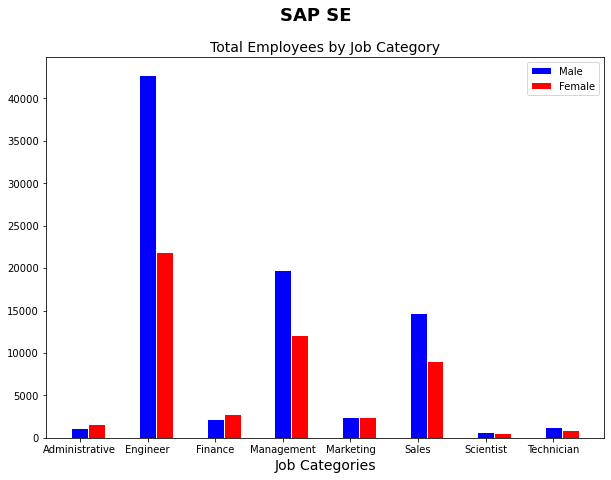

In [56]:
fig,ax = plt.subplots(nrows=1,ncols=1,sharex=True,figsize=(10,7))

# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = male['count']
bars2 = female['count']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='b', width=barWidth, edgecolor='white', label='Male')
plt.bar(r2, bars2, color='r', width=barWidth, edgecolor='white', label='Female')

plt.suptitle(company,size=18,fontweight='bold')
plt.title('Total Employees by Job Category',size=14)
plt.xlabel('Job Categories',size=14)
plt.xticks(male.reset_index().index,male.index.str.capitalize(),size=10)

# Create legend & Show graphic
plt.legend()
plt.show()

## We see that for this company, the most popular job is Engineer and that males outnumber females by a large margin. In marketing, there are much fewer employees, but this gender seems to be evenly split between males and females.

## So what does the rest of the sector look like? Let's see!

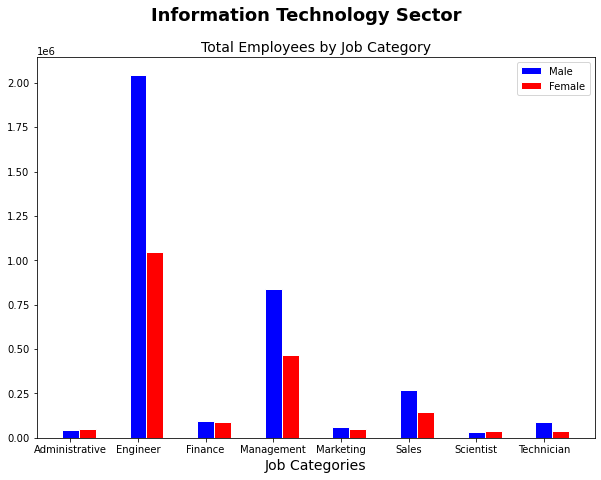

In [57]:
fig,ax = plt.subplots(nrows=1,ncols=1,sharex=True,figsize=(10,7))

# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = male_sector['count']
bars2 = female_sector['count']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='b', width=barWidth, edgecolor='white', label='Male')
plt.bar(r2, bars2, color='r', width=barWidth, edgecolor='white', label='Female')

plt.suptitle((sector+' Sector'),size=18,fontweight='bold')
plt.title('Total Employees by Job Category',size=14)
plt.xlabel('Job Categories',size=14)
plt.xticks(male_sector.reset_index().index,male_sector.index.str.capitalize(),size=10)

# Create legend & Show graphic
plt.legend()
plt.show()

## The graphs look fairly similar! Once again, Engineer is the most popular job, and the males outnumber females in this role. Management, marketing and sales for the sector look proportionally similar to SAP. This suggests the job breakdown for SAP is similar to the industry as a whole.

## The next thing we wanted to explore was the spread in the percentage of male and female employees, for both the company and the sector as a whole. So we took a similar approach as above, creating dataframes for the company and then sector. 

In [58]:
# Company Hiring Over Time
com_month = com.groupby(['month','gender'])[['count']].sum().reset_index()
com_month

# Find spread between % of employees as male vs female
com_month['percentage'] = 0
com_month['spread'] = 0      # Difference between % male and % female (spread = 0 if split is 50/50)
for i in range(len(com_month)):
    com_month.loc[i,'percentage'] = com_month.loc[i,'count']/com_month.loc[com_month['month']==com_month.loc[i,'month'],'count'].sum()
    com_month.loc[i,'spread'] = com_month.loc[i,'percentage']-(1-com_month.loc[i,'percentage'])
com_month

,month,gender,count,percentage,spread
0,2012-01,female,36466.199499,0.361394,-0.277213
1,2012-01,male,64438.147767,0.638606,0.277213
2,2012-02,female,36168.822520,0.362058,-0.275884
3,2012-02,male,63728.987334,0.637942,0.275884
4,2012-03,female,36550.846361,0.362682,-0.274637
...,...,...,...,...,...
213,2020-11,male,90746.382129,0.622676,0.245353
214,2020-12,female,54837.576261,0.377294,-0.245413
215,2020-12,male,90506.959978,0.622706,0.245413
216,2021-01,female,55548.758267,0.377504,-0.244991


## Note that we are exploring the spread over time. Good news is we have almost a decade of data!

In [59]:
male = com_month.loc[com_month['gender']=='male',:]
female = com_month.loc[com_month['gender']=='female',:]
female

,month,gender,count,percentage,spread
0,2012-01,female,36466.199499,0.361394,-0.277213
2,2012-02,female,36168.822520,0.362058,-0.275884
4,2012-03,female,36550.846361,0.362682,-0.274637
6,2012-04,female,36983.197301,0.362355,-0.275289
8,2012-05,female,37205.937861,0.362732,-0.274536
...,...,...,...,...,...
208,2020-09,female,54961.992726,0.376958,-0.246085
210,2020-10,female,55166.373240,0.377171,-0.245658
212,2020-11,female,54989.633387,0.377324,-0.245353
214,2020-12,female,54837.576261,0.377294,-0.245413


In [60]:
male

,month,gender,count,percentage,spread
1,2012-01,male,64438.147767,0.638606,0.277213
3,2012-02,male,63728.987334,0.637942,0.275884
5,2012-03,male,64228.590093,0.637318,0.274637
7,2012-04,male,65080.121346,0.637645,0.275289
9,2012-05,male,65365.512941,0.637268,0.274536
...,...,...,...,...,...
209,2020-09,male,90842.157416,0.623042,0.246085
211,2020-10,male,91097.117671,0.622829,0.245658
213,2020-11,male,90746.382129,0.622676,0.245353
215,2020-12,male,90506.959978,0.622706,0.245413


## Now that we have company dataframes, we do the same for the sector.

In [61]:
# Sector Hiring Over Time
sector_df3 = df.loc[(df['sector']==sector) & (df['company']!=company),:]
sector_month = sector_df3.groupby(['month','gender'])[['count']].sum().reset_index()
sector_month

# sectord spread between % of employees as male vs female
sector_month['percentage'] = 0
sector_month['spread'] = 0      # Difference between % male and % female (spread = 0 if split is 50/50)
for i in range(len(sector_month)):
    sector_month.loc[i,'percentage'] = sector_month.loc[i,'count']/sector_month.loc[sector_month['month']==sector_month.loc[i,'month'],'count'].sum()
    sector_month.loc[i,'spread'] = sector_month.loc[i,'percentage']-(1-sector_month.loc[i,'percentage'])
sector_month

,month,gender,count,percentage,spread
0,2012-01,female,1.477909e+06,0.337733,-0.324533
1,2012-01,male,2.898057e+06,0.662267,0.324533
2,2012-02,female,1.464526e+06,0.337598,-0.324804
3,2012-02,male,2.873549e+06,0.662402,0.324804
4,2012-03,female,1.471618e+06,0.337673,-0.324653
...,...,...,...,...,...
213,2020-11,male,3.604468e+06,0.643866,0.287731
214,2020-12,female,1.992873e+06,0.356389,-0.287222
215,2020-12,male,3.598973e+06,0.643611,0.287222
216,2021-01,female,2.001095e+06,0.356462,-0.287076


## Now we build the graph to see how the company compares to the sector.

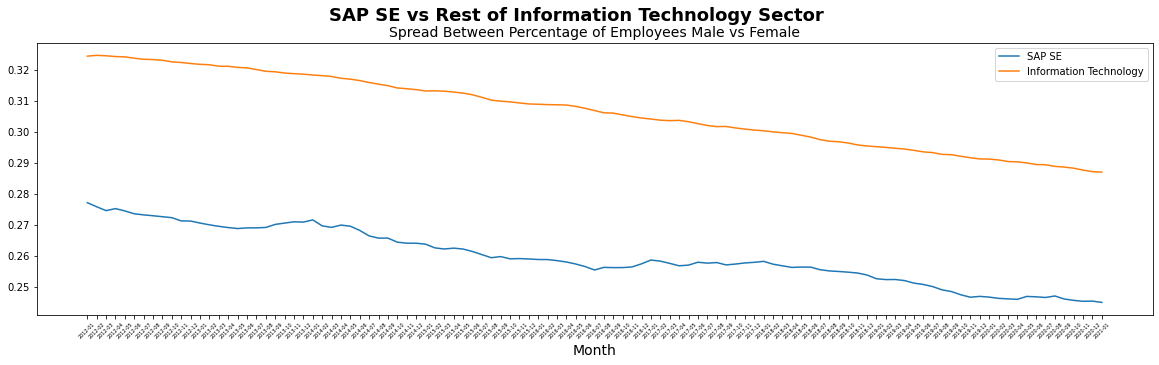

In [62]:
fig,ax = plt.subplots(figsize=(20,5))
x=com_month.loc[com_month['gender']=='male','spread']
z=sector_month.loc[sector_month['gender']=='male','spread']
x.plot.line(ax=ax,label=company)
z.plot.line(ax=ax,label=sector)

plt.suptitle(company+' vs Rest of '+sector+' Sector',size=18,fontweight='bold')
plt.title('Spread Between Percentage of Employees Male vs Female',size=14)
plt.xlabel('Month',size=14)

plt.xticks(com_month.loc[com_month['gender']=='male'].index,com_month.loc[com_month['gender']=='male','month'],size=5,rotation=45)

plt.legend()
plt.show()

## Interesting! We see that SAP does better than the sector in lowering the spread. And overall, the company and the Information Technology sector are trending in the right direction towards equiality between the genders.

## The last question we wanted to explore is "What is the job makeup of the spread?". We know that the overall trend is that the spread is lowering so another way to ask the question is, "Which jobs have added more males than females?" And again, we started by filtering the data for the company, and then doing the same for the sector.

In [63]:
# Company Hiring Over Time
com_all = df.loc[df['company']==company,:]
com_split = com_all.groupby(['month','gender','job_category'])[['count']].sum().reset_index()
com_split

# Find spread between % of employees as male vs female
com_split['percentage'] = 0
com_split['end'] = 0         # Percentage change in employee count for each gender from beginning to end of data
for i in range(len(com_split)):
    com_split.loc[i,'percentage'] = com_split.loc[i,'count']/com_split.loc[(com_split['month']==com_split.loc[i,'month']) & (com_split['job_category']==com_split.loc[i,'job_category']),'count'].sum()
    com_split.loc[i,'end'] = float(com_split.loc[(com_split['month']==com_split['month'].max()) & (com_split['job_category']==com_split.loc[i,'job_category']) & (com_split['gender']==com_split.loc[i,'gender']),'count'])/float(com_split.loc[(com_split['month']==com_split['month'].min()) & (com_split['job_category']==com_split.loc[i,'job_category']) & (com_split['gender']==com_split.loc[i,'gender']),'count'])-1

com_split

,month,gender,job_category,count,percentage,end
0,2012-01,female,administrative,1348.621891,0.595723,0.236178
1,2012-01,female,engineer,14063.300303,0.329508,0.556981
2,2012-01,female,finance,2424.508291,0.567674,0.157904
3,2012-01,female,management,8697.102947,0.361849,0.388249
4,2012-01,female,marketing,1726.873447,0.476206,0.421581
...,...,...,...,...,...,...
1739,2021-01,male,management,19768.980969,0.620832,0.288882
1740,2021-01,male,marketing,2429.439793,0.497395,0.279027
1741,2021-01,male,sales,14706.523032,0.620441,0.389158
1742,2021-01,male,scientist,643.006230,0.555210,-0.078433


In [64]:
end = com_split.loc[com_split['month']==com_split['month'].max(),:]
end['job_category'] = end['job_category'].str.capitalize()
end = end.set_index('job_category')
end

<ipython-input-64-065169756a2c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  end['job_category'] = end['job_category'].str.capitalize()


,month,gender,count,percentage,end
job_category,,,,,
Administrative,2021-01,female,1667.136698,0.597888,0.236178
Engineer,2021-01,female,21896.292123,0.338850,0.556981
Finance,2021-01,female,2807.347850,0.565118,0.157904
Management,2021-01,female,12073.744171,0.379168,0.388249
Marketing,2021-01,female,2454.891281,0.502605,0.421581
Sales,2021-01,female,8996.800267,0.379559,0.699929
Scientist,2021-01,female,515.126167,0.444790,0.218607
Technician,2021-01,female,964.722746,0.420776,0.265390
Administrative,2021-01,male,1121.238775,0.402112,0.225106


## Now for the sector.

In [65]:
# Sector Hiring Over Time
sector_split = sector_df3.groupby(['month','gender','job_category'])[['count']].sum().reset_index()
sector_split

# sectord spread between % of employees as male vs female
sector_split['percentage'] = 0
sector_split['end'] = 0         # Percentage change in employee count for each gender from beginning to end of data
for i in range(len(sector_split)):
    sector_split.loc[i,'percentage'] = sector_split.loc[i,'count']/sector_split.loc[(sector_split['month']==sector_split.loc[i,'month']) & (sector_split['job_category']==sector_split.loc[i,'job_category']),'count'].sum()
    sector_split.loc[i,'end'] = float(sector_split.loc[(sector_split['month']==sector_split['month'].max()) & (sector_split['job_category']==sector_split.loc[i,'job_category']) & (sector_split['gender']==sector_split.loc[i,'gender']),'count'])/float(sector_split.loc[(sector_split['month']==sector_split['month'].min()) & (sector_split['job_category']==sector_split.loc[i,'job_category']) & (sector_split['gender']==sector_split.loc[i,'gender']),'count'])-1

sector_split

,month,gender,job_category,count,percentage,end
0,2012-01,female,administrative,42127.152773,0.529283,0.240733
1,2012-01,female,engineer,752041.492463,0.320538,0.390358
2,2012-01,female,finance,75624.839778,0.490744,0.170555
3,2012-01,female,management,343840.344795,0.335738,0.363687
4,2012-01,female,marketing,36567.402803,0.425577,0.326729
...,...,...,...,...,...,...
1739,2021-01,male,management,839045.818134,0.641503,0.233360
1740,2021-01,male,marketing,59841.731041,0.552266,0.212428
1741,2021-01,male,sales,269557.724893,0.646212,0.081245
1742,2021-01,male,scientist,33147.667979,0.480978,0.320884


In [66]:
sector_end = sector_split.loc[sector_split['month']==sector_split['month'].max(),:]
sector_end['job_category'] = sector_end['job_category'].str.capitalize()
sector_end = sector_end.set_index('job_category')
sector_end

<ipython-input-66-d1713d3666e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sector_end['job_category'] = sector_end['job_category'].str.capitalize()


,month,gender,count,percentage,end
job_category,,,,,
Administrative,2021-01,female,5.226853e+04,0.540328,0.240733
Engineer,2021-01,female,1.045607e+06,0.338692,0.390358
Finance,2021-01,female,8.852302e+04,0.480376,0.170555
Management,2021-01,female,4.688907e+05,0.358497,0.363687
Marketing,2021-01,female,4.851505e+04,0.447734,0.326729
Sales,2021-01,female,1.475772e+05,0.353788,0.225675
Scientist,2021-01,female,3.576951e+04,0.519022,0.424734
Technician,2021-01,female,3.733302e+04,0.291146,0.182979
Administrative,2021-01,male,4.446628e+04,0.459672,0.186852


## And now we build the graphs for the company.

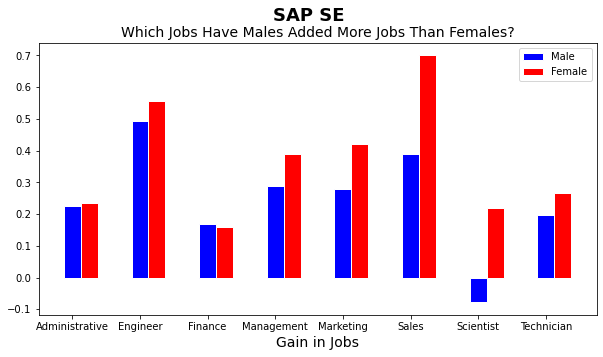

In [67]:
# Company Data

fig,ax = plt.subplots(figsize=(10,5))

# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = end.loc[end['gender']=='male','end']
bars2 = end.loc[end['gender']=='female','end']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='b', width=barWidth, edgecolor='white', label='Male')
plt.bar(r2, bars2, color='r', width=barWidth, edgecolor='white', label='Female')

plt.suptitle(company,size=18,fontweight='bold')
plt.title('Which Jobs Have Males Added More Jobs Than Females?',size=14)
plt.xlabel('Gain in Jobs',size=14)
plt.xticks(end.loc[end['gender']=='male',:].reset_index().index,end.loc[end['gender']=='male'].index,size=10)
plt.ylabel('')

# Create legend & Show graphic
plt.legend()
plt.show()

## Interesting! We see that Females were hired more in every job, with the exception of Finance. And in the Scientist job, Males lost roles.

## What does the sector look like? Lets's build the graph and take a look!

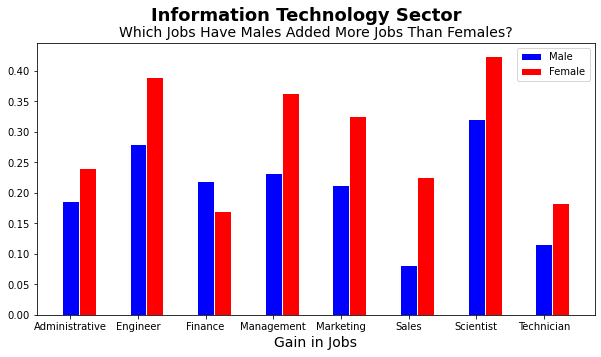

In [68]:
# Rest of Sector Data

fig,ax = plt.subplots(figsize=(10,5))

# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = sector_end.loc[sector_end['gender']=='male','end']
bars2 = sector_end.loc[sector_end['gender']=='female','end']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='b', width=barWidth, edgecolor='white', label='Male')
plt.bar(r2, bars2, color='r', width=barWidth, edgecolor='white', label='Female')

plt.suptitle(sector+' Sector',size=18,fontweight='bold')
plt.title('Which Jobs Have Males Added More Jobs Than Females?',size=14)
plt.xlabel('Gain in Jobs',size=14)
plt.xticks(sector_end.loc[sector_end['gender']=='male',:].reset_index().index,sector_end.loc[sector_end['gender']=='male'].index,size=10)
plt.ylabel('')

# Create legend & Show graphic
plt.legend()
plt.show()

## Again, we see that Finance is where Males have added more jobs than Females.

## We hope you enjoyed our project as much as we enjoyed creating it!